<a href="https://colab.research.google.com/github/ShivamVadalia/Underwater-Waste-Detection-Using-YoloV8-And-Water-Quality-Assessment/blob/main/Train_Underwater_Waste_Detection_YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Drive

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloading Dependencies

---



In [2]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 26.4 MB/s eta 0:00:00


In [3]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=fbd0b0263de190bc1c101d34ddff30b91bbf307817754472236e7176cca68d67
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

## Fetching dataset from Roboflow API

---



**Original Dataset**

In [ ]:
import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("object-detect-dmjpt").project("ocean_waste")
dataset = project.version(1).download("yolov8")

**Denoised Dataset**

In [5]:
import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("neural-ocean").project("neural_ocean")
dataset = project.version(3).download("yolov8")

You are already logged into Roboflow. To make a different login, run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.99, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to Neural_Ocean-3 in yolov8:: 100%|██████████| 10266/10266 [00:02<00:00, 3585.28it/s]


## Training

---



In [ ]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=60 \ # Try different number of epochs and find where the loss curve is converging for best output
imgsz=640

## Testing 

---



In [6]:
!yolo task=detect \
mode=predict \
model=/content/drive/MyDrive/Models/Denoised_Dataset_60_Epochs.pt \
conf=0.25 \
source={dataset.location}/test/images

Ultralytics YOLOv8.0.99 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs

image 1/501 /content/Neural_Ocean-3/test/images/1bc7-iudfmpmn7245599_jpg.rf.0c27f6617b1c2d7665a4badbb8474e28.jpg: 640x640 1 glove, 1 net, 16.3ms
image 2/501 /content/Neural_Ocean-3/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.2cb8ff79c143c7677ba333349c528e23.jpg: 640x640 1 Mask, 1 pbag, 2 pbottles, 16.3ms
image 3/501 /content/Neural_Ocean-3/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.6e27d3429e5c183f0785e36626e232c2.jpg: 640x640 1 pbag, 1 plastic, 16.3ms
image 4/501 /content/Neural_Ocean-3/test/images/7_JPG_jpg.rf.c73c6cc42828be1d9a13a8a520607ca8.jpg: 640x640 1 Mask, 16.3ms
image 5/501 /content/Neural_Ocean-3/test/images/GettyImages-1227891345-1000x667_jpg.rf.463d0f90b57eac0801f0a335a754dd23.jpg: 640x640 1 Mask, 1 pbag, 16.3ms
image 6/501 /content/Neural_Ocean-3/test/images/GettyI

## Run inference on random images

---



In [8]:
!yolo predict model=/content/drive/MyDrive/Models/Denoised_Dataset_60_Epochs.pt source='/content/demo.jpg'

Ultralytics YOLOv8.0.99 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/demo.jpg: 640x640 1 Mask, 1 pbag, 2 pbottles, 16.5ms
Speed: 3.9ms preprocess, 16.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


## Visualize on Google Colab

---



In [7]:
from google.colab.patches import cv2_imshow


image 1/1 /content/demo.jpg: 640x640 1 Mask, 1 pbag, 2 pbottles, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


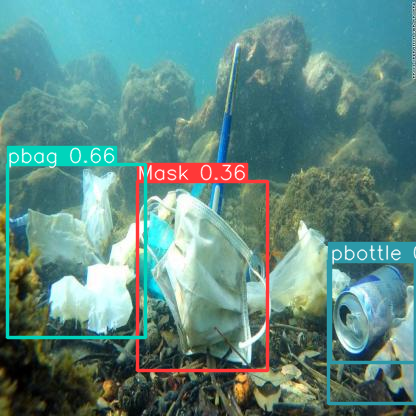

In [10]:
# Load the model to inference on test images
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/Models/Denoised_Dataset_60_Epochs.pt')  
results = model('/content/demo.jpg')  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)